### Import required modules

In [74]:
from scipy.stats import mannwhitneyu
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

### Lists to be tested

In [2]:
library = [0.57,0.32,0.72,0.56,0.51,0.68,0.6,0.54,0.62,0.3,0.47,0.49,0.42,0.74]
multimedia = [0.69,0.64,0.58,0.69,0.56,0.74,0.67,0.59,0.65,0.65,0.55,0.53,0.73,0.54]
utility = [0.57,0.68,0.44,0.61,0.65,0.51,0.65,0.56,0.52,0.29,0.69,0.53,0.76,0.32]
business = [0.53,0.55,0.44,0.7,0.7,0.56,0.53,0.59,0.59,0.62,0.57,0.65,0.75,0.59]

### Convert each list to dataframe for plotting purposes

In [30]:
library_df = pd.DataFrame(library)
multimedia_df = pd.DataFrame(multimedia)
utility_df = pd.DataFrame(utility)
business_df = pd.DataFrame(business)

### Parent lists

In [38]:
lists = [library, multimedia, utility, business] # Include all lists in this parent list to iterate through it
lists_names = ["Library", "Multimedia", "Utility", "Business"] # List of strings that holds the names. MUST BE IN THE SAME ORDER
lists_df = [library_df, multimedia_df, utility_df, business_df] # Include all dataframes in this list. MUST BE IN THE SAME ORDER

### Perform Mann-Whitney U test for all possible pair combinations

In [33]:
nr_lists = []
for i in range(len(lists)):
    nr_lists.append(i) 

In [91]:
pairs = list(itertools.combinations(nr_lists, 2))
for i in range(len(pairs)):
    result = mannwhitneyu(lists[pairs[i][0]], lists[pairs[i][1]])
    print("The p-value of the statistical significance test between",lists_names[pairs[i][0]], "and", lists_names[pairs[i][1]],"is:", result.pvalue, "\n") 
    

The p-value of the statistical significance test between Library and Multimedia is: 0.05941024968597615 

The p-value of the statistical significance test between Library and Utility is: 0.6789700083319852 

The p-value of the statistical significance test between Library and Business is: 0.23165221696225213 

The p-value of the statistical significance test between Multimedia and Utility is: 0.13450263442932778 

The p-value of the statistical significance test between Multimedia and Business is: 0.40678798682769346 

The p-value of the statistical significance test between Utility and Business is: 0.4337290935623229 



### Plot the results for all possible pair combinations

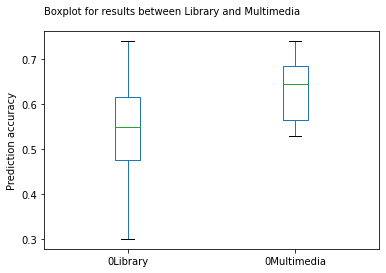

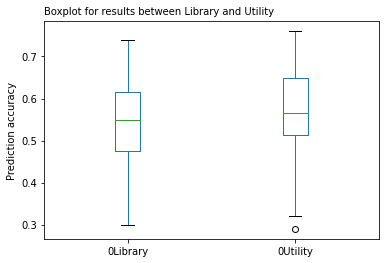

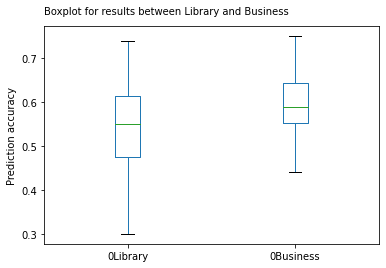

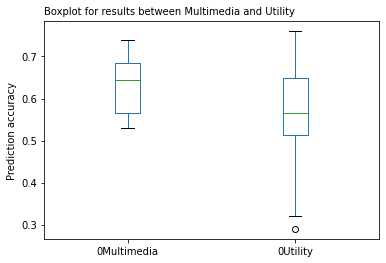

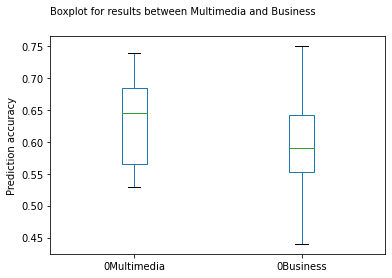

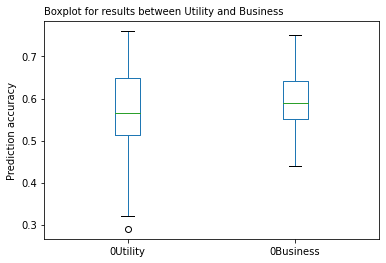

In [103]:
for i in range(len(pairs)):
    combined_df = lists_df[pairs[i][0]].join(lists_df[pairs[i][1]], lsuffix=lists_names[pairs[i][0]], rsuffix=lists_names[pairs[i][1]])
    pb = combined_df.boxplot(column=['0' + lists_names[pairs[i][0]], '0' + lists_names[pairs[i][1]]], grid=False)
    pb.set_ylabel('Prediction accuracy')
    plt.text(0.5, 0.8, "Boxplot for results between "+ lists_names[pairs[i][0]]+ " and "+ lists_names[pairs[i][1]]) 
    plt.show()